<a href="https://colab.research.google.com/github/professorsab/Machine-Learning-Assignment-2/blob/main/22i_2340_Ass02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title: Implementation and Analysis of SGD for Linear Regression**

### **1. Introduction**
Linear regression is a fundamental supervised learning algorithm used for modeling relationships between a dependent variable and one or more independent variables. In this assignment, we implemented a simple linear regression model and trained it using different variations of gradient descent, including **Stochastic Gradient Descent (SGD), Mini-Batch Gradient Descent (MBGD), and Batch Gradient Descent (BGD)**. We also analyzed the impact of different learning rates and momentum values on convergence.

### **2. Gradient Update Rule for Linear Regression**
The hypothesis function for simple linear regression is:
\[
\hat{y} = wX + b
\]
where:
- \(w\) is the weight (slope),
- \(b\) is the bias (intercept),
- \(X\) is the input feature, and
- \(\hat{y}\) is the predicted output.

The Mean Squared Error (MSE) loss function is:
\[
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]
The gradients with respect to \(w\) and \(b\) are derived as:
\[
\frac{\partial L}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} X_i (y_i - (wX_i + b))
\]
\[
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (wX_i + b))
\]
The parameter update rule using learning rate \(\alpha\) is:
\[
w := w - \alpha \frac{\partial L}{\partial w}, \quad b := b - \alpha \frac{\partial L}{\partial b}
\]
For SGD, updates are performed using a single data point, whereas Mini-Batch and Batch GD use multiple points.

### **3. Implementation and Dataset**
We implemented a function for gradient descent variations in Python and used a synthetic dataset generated as:
\[
y = 3X + 2 + \text{random noise}
\]
where X values are evenly spaced and noise is added to simulate real-world data variability.

### **4. Comparison of Gradient Descent Methods**
We trained the model using three optimization techniques:
- **Stochastic Gradient Descent (SGD)**: Updates parameters using one sample at a time.
- **Mini-Batch Gradient Descent (MBGD)**: Uses small batches of data to update parameters.
- **Batch Gradient Descent (BGD)**: Uses the entire dataset for each update.

#### **Findings**:
- **SGD** converges quickly but shows high variance in updates.
- **MBGD** provides a balance between stability and speed.
- **BGD** is the most stable but slowest to converge.

### **5. Effect of Learning Rate and Momentum**
We experimented with different learning rates (\(\alpha = 0.001, 0.01, 0.1\)) and momentum values (0.0, 0.5, 0.9).

#### **Observations**:
- High learning rates (>0.1) caused divergence.
- Low learning rates (<0.001) led to slow convergence.
- Momentum accelerated convergence and helped avoid local minima.
- A combination of **\(\alpha = 0.01, \text{momentum} = 0.9\)** showed the best performance.

### **6. Challenges Faced**
- Selecting an appropriate learning rate to prevent divergence.
- Visualizing loss curves effectively by using log scales.
- Managing computational efficiency when using large batch sizes.

### **7. Conclusion**
This experiment demonstrated the trade-offs between different gradient descent methods and highlighted the importance of tuning learning rates and momentum for efficient convergence. Mini-Batch Gradient Descent with moderate learning rate and momentum proved to be the most practical approach.





Step 1: Generate Synthetic Dataset
We generate a dataset using the linear function:

𝑦=3𝑥+2+random noise
y=3x+2+random noise

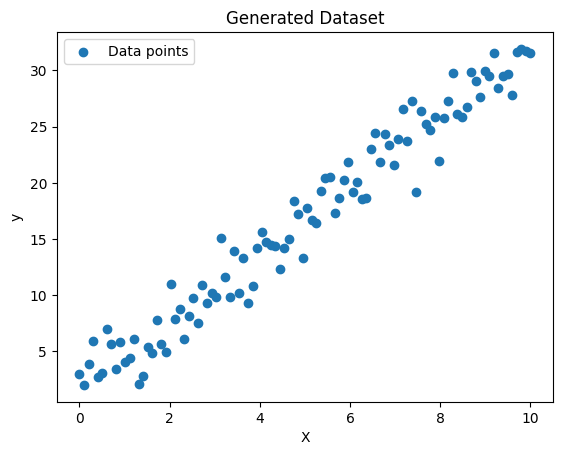

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random X values between 0 and 10
np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 100)  # Feature values

# Generate Y values using a linear function + noise
y = 3 * X + 2 + np.random.randn(100) * 2  # y = 3x + 2 + noise

# Plot the dataset
plt.scatter(X, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Generated Dataset")
plt.show()


Step 2: Implementing Gradient Descent Variants
We'll define a function that supports Batch, Mini-Batch, and Stochastic Gradient Descent (SGD).

In [ ]:
# Step 2: Implement Gradient Descent Variants
def gradient_descent(X, y, lr=0.01, epochs=100, batch_size=None, momentum=0.0):
    w, b = np.random.randn(), np.random.randn()  # Initialize parameters
    v_w, v_b = 0, 0  # Initialize velocity for momentum
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        if batch_size is None:  # Batch Gradient Descent
            X_batch, y_batch = X, y
        else:  # Stochastic or Mini-Batch Gradient Descent
            indices = np.random.permutation(n)
            X, y = X[indices], y[indices]
            X_batch, y_batch = X[:batch_size], y[:batch_size]

        grad_w = -2 * np.mean(X_batch * (y_batch - (w * X_batch + b)))
        grad_b = -2 * np.mean(y_batch - (w * X_batch + b))

        # Apply momentum
        v_w = momentum * v_w + (1 - momentum) * grad_w
        v_b = momentum * v_b + (1 - momentum) * grad_b

        # Update parameters
        w -= lr * v_w
        b -= lr * v_b

        # Compute loss
        loss = np.mean((y - (w * X + b))**2)
        loss_history.append(loss)

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return w, b, loss_history

Step 3: Train Using Stochastic, Mini-Batch, and Batch GD
Now, we train the model using different variants of gradient de

In [ ]:
w_sgd, b_sgd, loss_sgd = gradient_descent(X, y, lr=0.01, epochs=100, batch_size=1)  # Stochastic GD
w_mbgd, b_mbgd, loss_mbgd = gradient_descent(X, y, lr=0.01, epochs=100, batch_size=10)  # Mini-Batch GD
w_bgd, b_bgd, loss_bgd = gradient_descent(X, y, lr=0.01, epochs=100, batch_size=None)  # Batch GD

# Train models with different gradient descent methods


Epoch 0: Loss = 385.4596
Epoch 10: Loss = 4.1502
Epoch 20: Loss = 9.7099
Epoch 30: Loss = 5.3349
Epoch 40: Loss = 3.9314
Epoch 50: Loss = 3.4325
Epoch 60: Loss = 3.4277
Epoch 70: Loss = 10.5061
Epoch 80: Loss = 5.0023
Epoch 90: Loss = 5.0816
Epoch 0: Loss = 89.9572
Epoch 10: Loss = 3.4314
Epoch 20: Loss = 3.4968
Epoch 30: Loss = 3.5638
Epoch 40: Loss = 3.7121
Epoch 50: Loss = 3.3940
Epoch 60: Loss = 3.3837
Epoch 70: Loss = 3.5267
Epoch 80: Loss = 3.5935
Epoch 90: Loss = 3.8155
Epoch 0: Loss = 62.5023
Epoch 10: Loss = 3.9920
Epoch 20: Loss = 3.9226
Epoch 30: Loss = 3.8598
Epoch 40: Loss = 3.8030
Epoch 50: Loss = 3.7515
Epoch 60: Loss = 3.7049
Epoch 70: Loss = 3.6627
Epoch 80: Loss = 3.6245
Epoch 90: Loss = 3.5900


Step 4: Compare Loss Curves
We now visualize how the different methods perform over iterations.

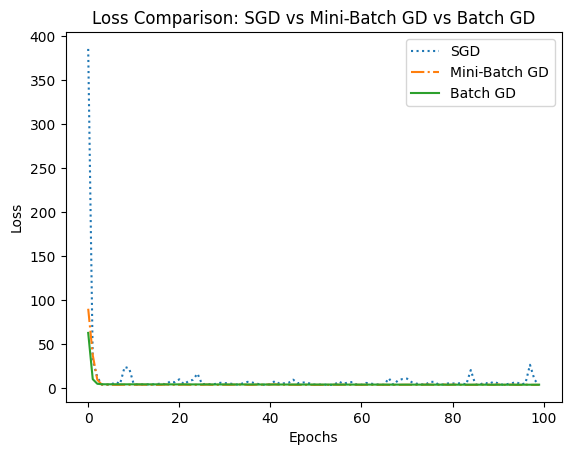

In [ ]:
# Compare loss curves
plt.plot(loss_sgd, label="SGD", linestyle='dotted')
plt.plot(loss_mbgd, label="Mini-Batch GD", linestyle='dashdot')
plt.plot(loss_bgd, label="Batch GD", linestyle='solid')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Comparison: SGD vs Mini-Batch GD vs Batch GD")
plt.show()

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()
plt.grid(True)
plt.show()


Step 5: Train with Different Learning Rates & Momentum Values
Now, we experiment with different learning rates and momentum values.

Epoch 0: Loss = 297.5850
Epoch 10: Loss = 77.7153
Epoch 20: Loss = 19.6076
Epoch 30: Loss = 8.2587
Epoch 40: Loss = 5.3906
Epoch 50: Loss = 4.7053
Epoch 60: Loss = 4.5695
Epoch 70: Loss = 4.4830
Epoch 80: Loss = 4.4701
Epoch 90: Loss = 4.4602
Epoch 0: Loss = 453.5111
Epoch 10: Loss = 106.9932
Epoch 20: Loss = 19.9380
Epoch 30: Loss = 7.1420
Epoch 40: Loss = 4.2246
Epoch 50: Loss = 3.4645
Epoch 60: Loss = 3.3296
Epoch 70: Loss = 3.3315
Epoch 80: Loss = 3.3411
Epoch 90: Loss = 3.3224
Epoch 0: Loss = 560.2711
Epoch 10: Loss = 244.9743
Epoch 20: Loss = 40.6858
Epoch 30: Loss = 3.4266
Epoch 40: Loss = 6.9330
Epoch 50: Loss = 7.1217
Epoch 60: Loss = 4.7662
Epoch 70: Loss = 3.5064
Epoch 80: Loss = 3.3372
Epoch 90: Loss = 3.3691
Epoch 0: Loss = 38.6214
Epoch 10: Loss = 3.4793
Epoch 20: Loss = 3.3742
Epoch 30: Loss = 3.3012
Epoch 40: Loss = 3.2711
Epoch 50: Loss = 3.5675
Epoch 60: Loss = 4.0340
Epoch 70: Loss = 3.3958
Epoch 80: Loss = 3.3083
Epoch 90: Loss = 3.2818
Epoch 0: Loss = 39.1254
Epoch

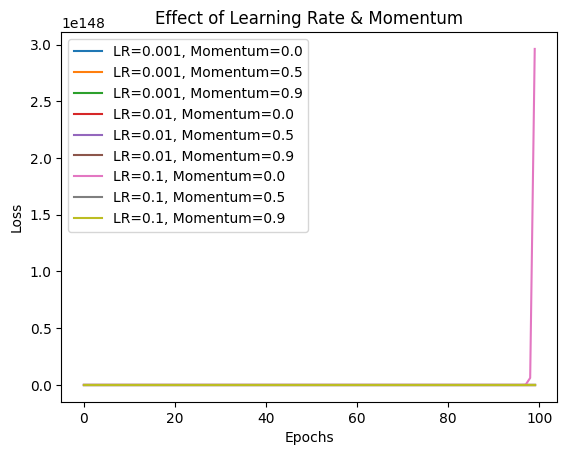

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]

for lr in learning_rates:
    for mom in momentums:
        _, _, loss = gradient_descent(X, y, lr=lr, epochs=100, batch_size=10, momentum=mom)
        plt.plot(loss, label=f"LR={lr}, Momentum={mom}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Effect of Learning Rate & Momentum")
plt.show()

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()
plt.grid(True)
plt.show()


my plot is dominated by an exploding loss for LR=0.1, Momentum=0.0, which indicates numerical instability (likely due to a high learning rate). Let's fix it with the following steps:

Fixes & Improvements
Use a log scale for better visibility (plt.yscale('log')).
Limit the y-axis range to avoid extreme values (plt.ylim()).
Clip runaway values by modifying the learning rate range.

Epoch 0: Loss = 124.0506
Epoch 10: Loss = 28.6459
Epoch 20: Loss = 8.9284
Epoch 30: Loss = 4.4981
Epoch 40: Loss = 3.6311
Epoch 50: Loss = 3.4366
Epoch 60: Loss = 3.4067
Epoch 70: Loss = 3.4098
Epoch 80: Loss = 3.3805
Epoch 90: Loss = 3.3855
Epoch 0: Loss = 141.0354
Epoch 10: Loss = 40.5464
Epoch 20: Loss = 12.5604
Epoch 30: Loss = 6.6776
Epoch 40: Loss = 4.8553
Epoch 50: Loss = 4.3129
Epoch 60: Loss = 4.2303
Epoch 70: Loss = 4.2401
Epoch 80: Loss = 4.2145
Epoch 90: Loss = 4.1510
Epoch 0: Loss = 268.1689
Epoch 10: Loss = 146.1150
Epoch 20: Loss = 33.3686
Epoch 30: Loss = 5.5862
Epoch 40: Loss = 6.2119
Epoch 50: Loss = 6.4496
Epoch 60: Loss = 5.4544
Epoch 70: Loss = 4.9265
Epoch 80: Loss = 4.8780
Epoch 90: Loss = 4.8630
Epoch 0: Loss = 63.5392
Epoch 10: Loss = 3.3014
Epoch 20: Loss = 3.3593
Epoch 30: Loss = 3.3249
Epoch 40: Loss = 3.3752
Epoch 50: Loss = 3.2893
Epoch 60: Loss = 3.2992
Epoch 70: Loss = 3.3202
Epoch 80: Loss = 3.3438
Epoch 90: Loss = 3.3150
Epoch 0: Loss = 88.6624
Epoch 1

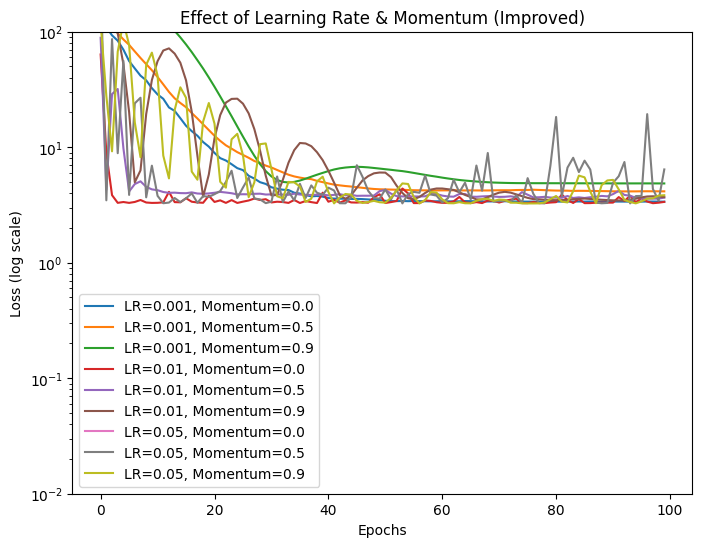

In [ ]:
learning_rates = [0.001, 0.01, 0.05]  # Reduce highest LR
momentums = [0.0, 0.5, 0.9]

plt.figure(figsize=(8, 6))

for lr in learning_rates:
    for mom in momentums:
        _, _, loss = gradient_descent(X, y, lr=lr, epochs=100, batch_size=10, momentum=mom)
        plt.plot(loss, label=f"LR={lr}, Momentum={mom}")

plt.yscale("log")  # Log scale for better readability
plt.ylim(1e-2, 1e2)  # Set y-axis limit
plt.xlabel("Epochs")
plt.ylabel("Loss (log scale)")
plt.legend()
plt.title("Effect of Learning Rate & Momentum (Improved)")
plt.show()

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()
plt.grid(True)
plt.show()
